## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
print("Shape: ",diabetes_data.shape)
print("Missing: ",diabetes_data.isnull().sum())
diabetes_data.value_counts()

Shape:  (768, 9)
Missing:  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data[cols] = diabetes_data[cols].replace(['0', 0], np.nan)
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


**<font color='teal'> Plot histograms of each column. </font>**

array([<AxesSubplot:title={'center':'Pregnancies'}>,
       <AxesSubplot:title={'center':'Glucose'}>,
       <AxesSubplot:title={'center':'BloodPressure'}>,
       <AxesSubplot:title={'center':'SkinThickness'}>,
       <AxesSubplot:title={'center':'Insulin'}>,
       <AxesSubplot:title={'center':'BMI'}>,
       <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
       <AxesSubplot:title={'center':'Age'}>,
       <AxesSubplot:title={'center':'Outcome'}>], dtype=object)

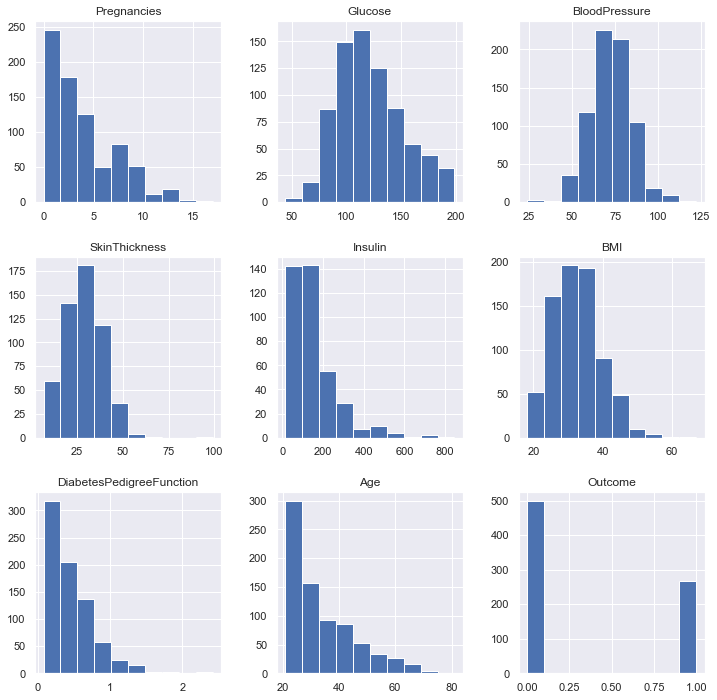

In [6]:
fig, axis = plt.subplots(3,3,figsize=(12, 12))
diabetes_data.hist(ax=axis)

#### Replace the zeros with mean and median values.

In [7]:
# observing the data from each category, it appears that only the bloodPressure data appears normally distributed
# All other values will use median for replacement
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].median(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

array([<AxesSubplot:title={'center':'Pregnancies'}>,
       <AxesSubplot:title={'center':'Glucose'}>,
       <AxesSubplot:title={'center':'BloodPressure'}>,
       <AxesSubplot:title={'center':'SkinThickness'}>,
       <AxesSubplot:title={'center':'Insulin'}>,
       <AxesSubplot:title={'center':'BMI'}>,
       <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
       <AxesSubplot:title={'center':'Age'}>,
       <AxesSubplot:title={'center':'Outcome'}>], dtype=object)

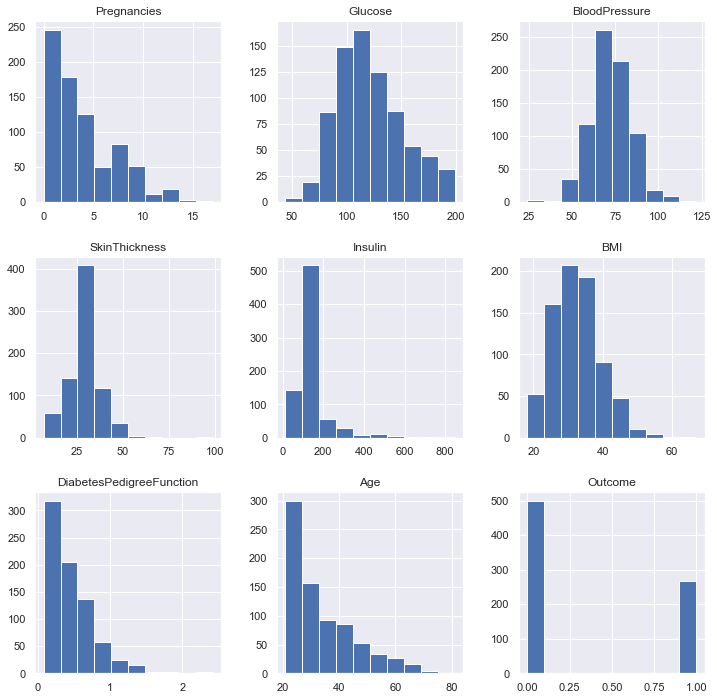

In [8]:
fig, axis = plt.subplots(3,3,figsize=(12, 12))
diabetes_data.hist(ax=axis)

#### Plot the correlation matrix heatmap

Correlation between various features


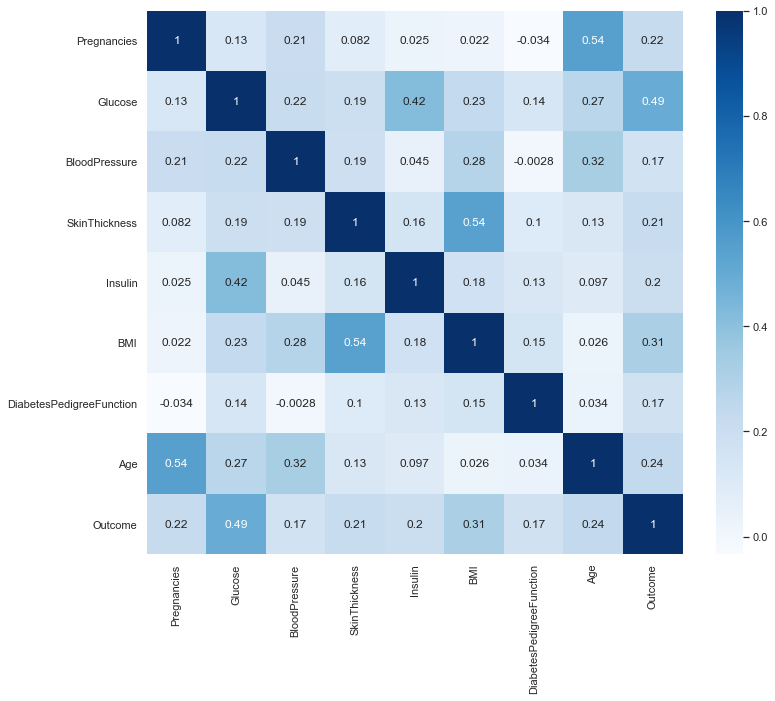

In [9]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `X` variable as df without `Outcome`, and `y` variable as the `Outcome` column.</font>**

Data types: X,y  <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Shape of X:  (768, 8)
Shape of y:  (768,)


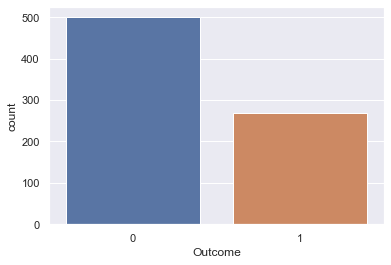

In [10]:
X = diabetes_data.drop('Outcome',axis=1)
y = diabetes_data['Outcome']
print("Data types: X,y ",type(X),type(y))
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)
sns.countplot(x=y,data=diabetes_data)
plt.show()

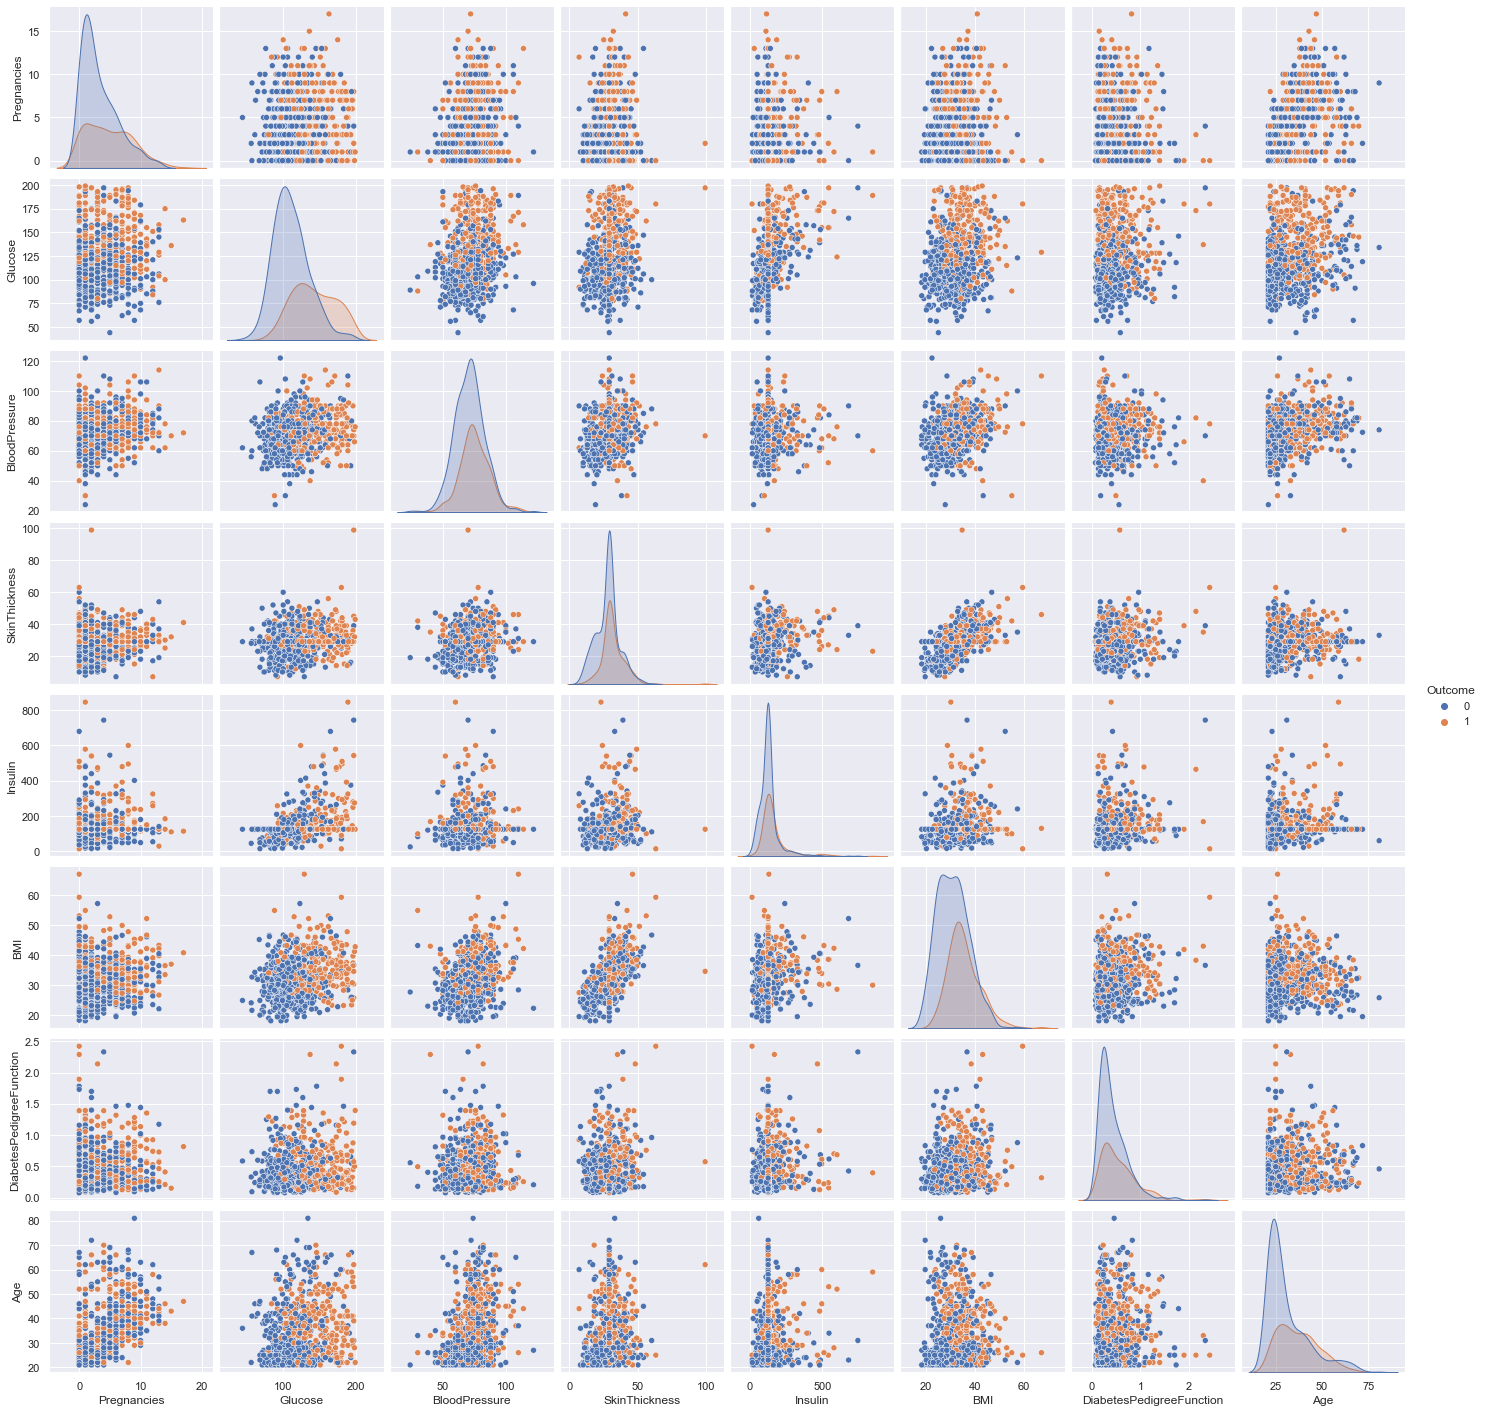

In [11]:
# Show relationships between data using sns
sns.pairplot(diabetes_data, hue='Outcome')

In [12]:
# Standardize the data, and prepare to split into train/test datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [13]:
# Split into training and test set with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)
# print out shapes to verify sizes are 70/30 and same between X and y

Shape of X_train:  (537, 8)
Shape of y_train:  (537,)
Shape of X_test:  (231, 8)
Shape of y_test:  (231,)


In [14]:
# Look at X_train data, it needs normalization
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.882682,121.564246,72.244542,28.886406,138.057728,32.615829,0.480529,33.551210
std,3.350097,29.951703,12.186644,8.259105,79.727535,6.730690,0.335253,11.794639
min,0.000000,57.000000,24.000000,7.000000,16.000000,18.200000,0.084000,21.000000
25%,1.000000,99.000000,64.000000,25.000000,122.000000,27.800000,0.246000,24.000000
50%,3.000000,117.000000,72.405184,29.000000,125.000000,32.400000,0.385000,30.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.400000,0.645000,41.000000
max,17.000000,198.000000,122.000000,60.000000,744.000000,67.100000,2.329000,81.000000


# Using Sklearn, standarize the magnitude of the features by scaling the values.

In [15]:
# Apply StandardScaler
ss = StandardScaler()
all_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
# Use StandardScaler to fit and transform on X_train to avoid data leakage
X_train = ss.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=all_cols)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.931383,2.086491,0.965518,0.498532,-0.163932,0.428910,-0.374779,0.632129
1,0.632606,-1.221912,0.472716,0.013767,-0.163932,-0.210550,-0.294168,0.716992
2,-0.562502,-0.520129,-0.677154,0.740915,-0.239259,-0.314648,2.745172,0.038086
3,-0.562502,-0.720639,-1.498489,-0.107425,-0.415020,0.770947,0.052162,-0.810548
4,0.333829,-0.586966,0.144182,0.013767,-0.163932,-0.567458,-0.977870,1.226172


In [16]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,-5.023914e-17,1.137100e-17,1.868979e-16,2.143950e-16,6.796110e-17,1.134722e-15,1.323171e-16,-2.069522e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.160056e+00,-2.157622e+00,-3.962496e+00,-2.652444e+00,-1.532363e+00,-2.143802e+00,-1.183876e+00,-1.065138e+00
25%,-8.612793e-01,-7.540568e-01,-6.771536e-01,-4.709989e-01,-2.015953e-01,-7.161701e-01,-7.002091e-01,-8.105476e-01
50%,-2.637251e-01,-1.525289e-01,1.319408e-02,1.376662e-02,-1.639321e-01,-3.209625e-02,-2.852109e-01,-3.013676e-01
75%,6.326063e-01,6.495082e-01,6.369833e-01,3.773408e-01,-1.011600e-01,5.627505e-01,4.910448e-01,6.321291e-01
max,3.919155e+00,2.554346e+00,4.086593e+00,3.770700e+00,7.607250e+00,5.128200e+00,5.518793e+00,4.026663e+00


In [17]:
# Use StandardScaler to transform on X_test
X_test = ss.transform(X_test)
X_test = pd.DataFrame(X_test, columns=all_cols)
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.263725,0.281908,0.472716,-0.713382,-0.741435,-0.626943,-0.470318,0.038086
1,0.035052,-0.419875,-0.677154,1.831637,-0.490347,0.324812,1.267301,-0.640821
2,2.126492,0.716345,1.786853,0.498532,0.099711,0.592493,-0.676324,1.480762
3,0.035052,0.749763,0.801250,0.377341,-0.163932,0.875045,0.219355,0.292676
4,1.230161,-0.553547,2.279654,0.862106,-0.163932,1.588861,-0.721108,0.971582


In [18]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,-0.037379,0.010222,0.043866,0.089314,0.109113,-0.079414,-0.085887,-0.087556
std,1.021866,1.056212,0.977519,1.202079,1.256561,1.070875,0.960870,0.990643
min,-1.160056,-2.592058,-2.319825,-2.288870,-1.557472,-2.143802,-1.201790,-1.065138
25%,-0.861279,-0.720639,-0.512886,-0.592190,-0.195318,-0.946673,-0.727079,-0.895411
50%,-0.263725,-0.119111,-0.020085,0.013767,-0.163932,-0.091581,-0.413592,-0.471094
75%,0.632606,0.599381,0.554850,0.498532,-0.163932,0.607364,0.353707,0.419971
max,3.321600,2.587765,3.100990,8.497164,8.887800,3.983120,5.790483,3.008302


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,11):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [20]:
#Print the train and test scores for each iteration.
print("Iter \t Train \t  Test")
for x in range(len(train_scores)):
    print('  %d' % x,'\t %0.3f' % train_scores[x],'\t %0.3f' % test_scores[x])

Iter 	 Train 	  Test
  0 	 1.000 	 0.719
  1 	 0.844 	 0.719
  2 	 0.862 	 0.740
  3 	 0.829 	 0.740
  4 	 0.834 	 0.745
  5 	 0.814 	 0.740
  6 	 0.806 	 0.736
  7 	 0.806 	 0.749
  8 	 0.803 	 0.745
  9 	 0.810 	 0.736


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [21]:
# Identify the number of neighbors that resulted in the max score in the training dataset.
scores_check = train_scores[:]
scores_check.pop(0)
max_train_score = max(scores_check)
best_k = train_scores.index(max_train_score)
print("Max train score: %0.3f" % max_train_score, "K value at: ",best_k)

Max train score: 0.862 K value at:  2


Plot the train and test model performance by number of neighbors.

Number of train/test scores:  10 10


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


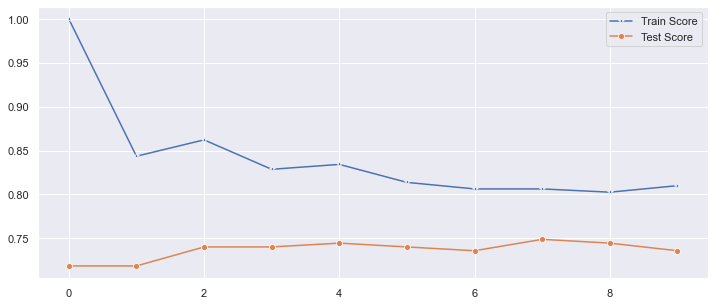

In [22]:
plt.figure(figsize=(12,5))
size = len(train_scores)
print("Number of train/test scores: ",len(train_scores),len(test_scores))
p = sns.lineplot(range(size),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(size),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [23]:
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7186147186147186

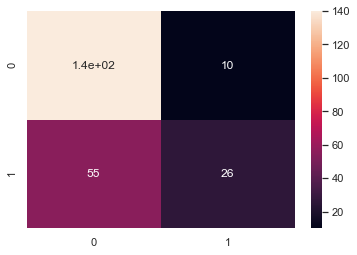

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
#Plot the confusion matrix for the knn model
g = sns.heatmap(pl, annot=True)

In [25]:
# Print the Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       150
           1       0.72      0.32      0.44        81

    accuracy                           0.72       231
   macro avg       0.72      0.63      0.63       231
weighted avg       0.72      0.72      0.68       231



AUC:  0.7197530864197531


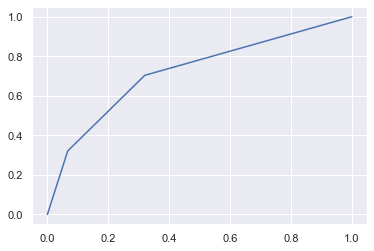

In [26]:
# Print the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = knn.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test,y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
print("AUC: ",auc)
plt.plot(fpr, tpr)

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [28]:
print("Best KNN Score:" + str(knn_cv.best_score_))
print("Best KNN Parameters: " + str(knn_cv.best_params_))

Best KNN Score:0.752703505644682
Best KNN Parameters: {'n_neighbors': 14}


### According to the GridSearch method applied to the dataset, the ideal number of n_neighbors for this model is 14. 

In [29]:
# Now, following the KNN example, apply this grid search method 
#  to find the optimal number of estimators in a Randon Forest model
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# Create Random Forest Classifier
forest = RandomForestClassifier(random_state = 42, n_estimators = 500, max_depth = 8)
model_rf = forest.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.765 (0.045)


In [30]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

knn_rf = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
knn_rf.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.9min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=500,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             verbose=1)

In [31]:
print("Best Random Forest Score:" + str(knn_rf.best_score_))
print("Best Random Forest Parameters: " + str(knn_rf.best_params_))

Best Random Forest Score:0.7709497206703911
Best Random Forest Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 100}


The GridSearch method in both the cases of KNN and Randomforest found a parameter that improved model accuracy.